In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-07-30 13:42:03--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2025-07-30 13:42:04--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2025-07-30 13:42:04--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [4]:
import numpy as np
fruits = np.load('fruits_300.npy')
print(fruits[0])
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100*100) 
print()
print(fruits_2d[0])
print(fruits_2d.shape)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(300, 100, 100)

[1 1 1 ... 1 1 1]
(300, 10000)


---
# KMeans 알고리즘
- KMeans알고리즘의 동작
    - 클러스터 중심을 랜덤하게 k개(`n_clusters`) 생성
    - 클러스터 중심을 조금씩 이동시키면서, 클러스터에 포함되는 샘플 중 레이블 변화가 없을 때까지 중심점 이동을 반복


In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [6]:
print(km.labels_)
print(len(km.labels_)) # 라벨의 개수는 데이터 샘플의 개수와 동일
print(np.unique(km.labels_, return_counts=True)) # 각 라벨 당 샘플의 개수

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
300
(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


- 레이블값 `0,1,2`는 어떤 의미도 갖고있지 않다. 레이블 `0,1,2`가 어떤 데이터인지(어떤 과일인지) 직접 이미지를 출력해보는수밖에 없다.
    - 직접 그려보기 위한 간단한 유틸리티 함수인 `draw_fruits()`를 만들고, 이를 통해 레이블로 분류된 각 데이터 샘플을 모두 직접 출력해보자.

### 레이블에 속한 각 데이터 샘플 그려보기

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): 
    num_of_sample = len(arr) # 데이터 샘플 개수
    
    rows = int(np.ceil(num_of_sample/10)) # 한줄에 10개씩 그리기 위함 (.ceil은 소숫점 올림 기능)
    cols = num_of_sample if rows < 2 else 10
    
    fig, ax = plt.subplots(
        rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < num_of_sample:
                ax[i, j].imshow(arr[i*10+j], cmap='gray_r')
            ax[i, j].axis('off')
    plt.show()

`0`으로 레이블링된(클러스터링된) 샘플만 대표로 출력해보기

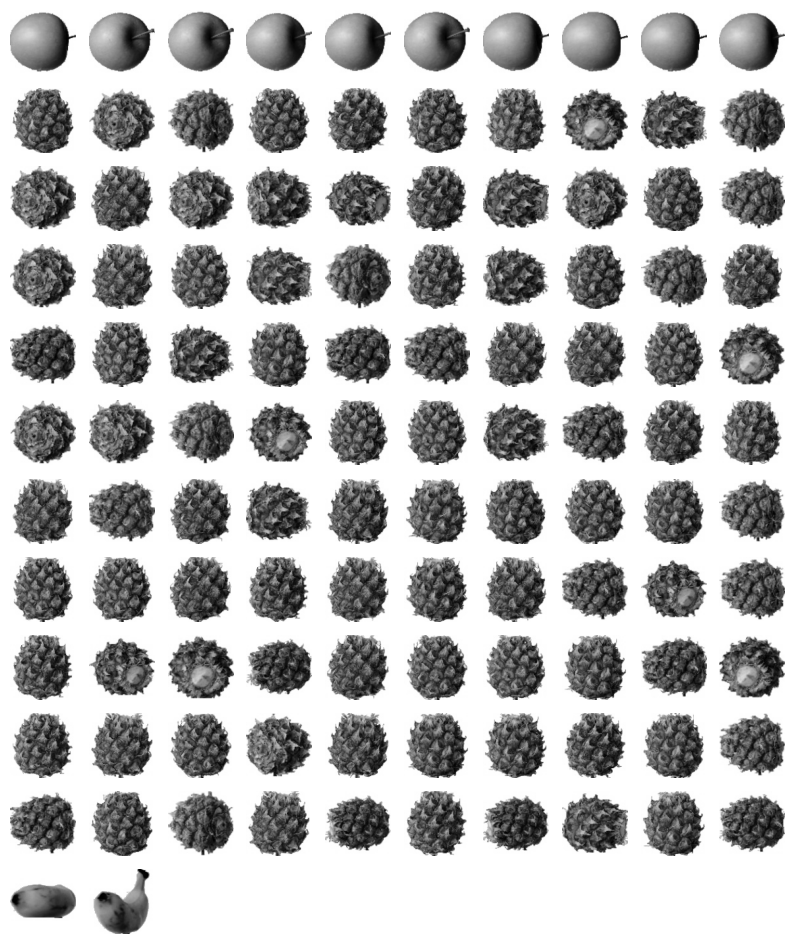

In [8]:
draw_fruits(fruits[km.labels_==0])

---
# 클러스터 중심
- KMeans알고리즘이 만들어낸 클러스터 중심은 `.cluster_centers`내에 포함되어있다.

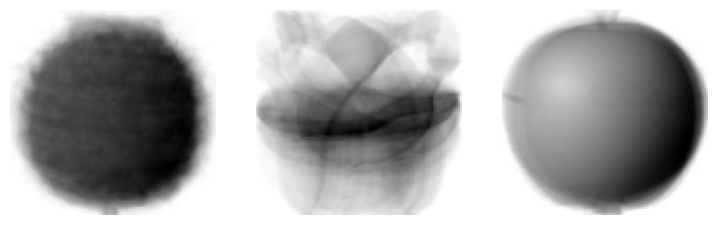

In [9]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

---
# 최적의 K찾기
- KMeans알고리즘을 가장 효과적으로 활용하기 위해서는 최적의 클러스터수를 설정하는것이 중요하다. 데이터의 레이블 개수와 클러스터 개수를 정확하게 일치시킨다면 베스트이다.
- 엘보우 기법과 이너셔
    - 클러스터 개수를 늘려감에 따른 이너셔값을 그려보면 그래프가 꺾이는 지점이 있는데, 꺾이는 지점을 엘보우 지점이라고 하며, 그 지점이 최적의 K값에 해당한다.
    - 엘보우 지점 이상으로 클러스터 개수가 많아지면 이너셔의 변화가 줄어들면서 클러스터링의 효과도 같이 줄어들게되는 원리이다.

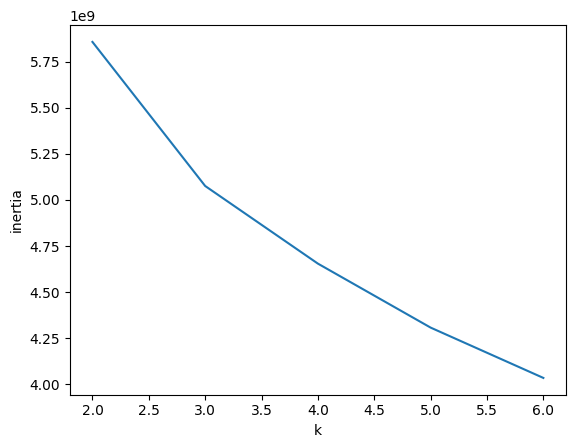

In [11]:
inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()